Text(0.5, 0.98, 'img')

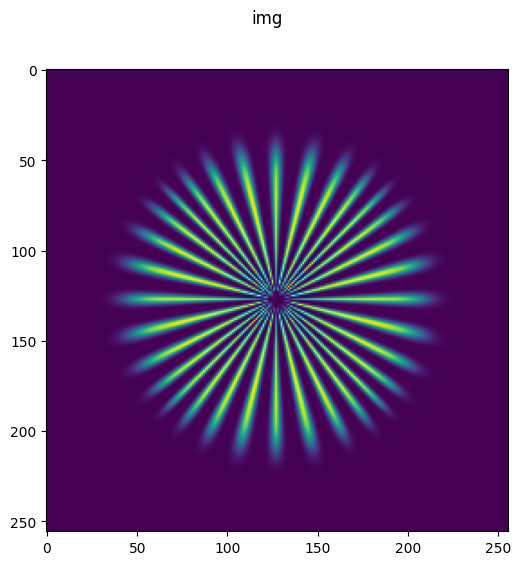

In [58]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d

im_path='../../images/'
img_name='star.tif'

img=imread(im_path+img_name)
img=img.astype('float32')
n=img.shape[0]

fig=imshow2d(img)
fig.suptitle('img')

Text(0.5, 0.98, 'Ground Truth Wavelet Transforms')

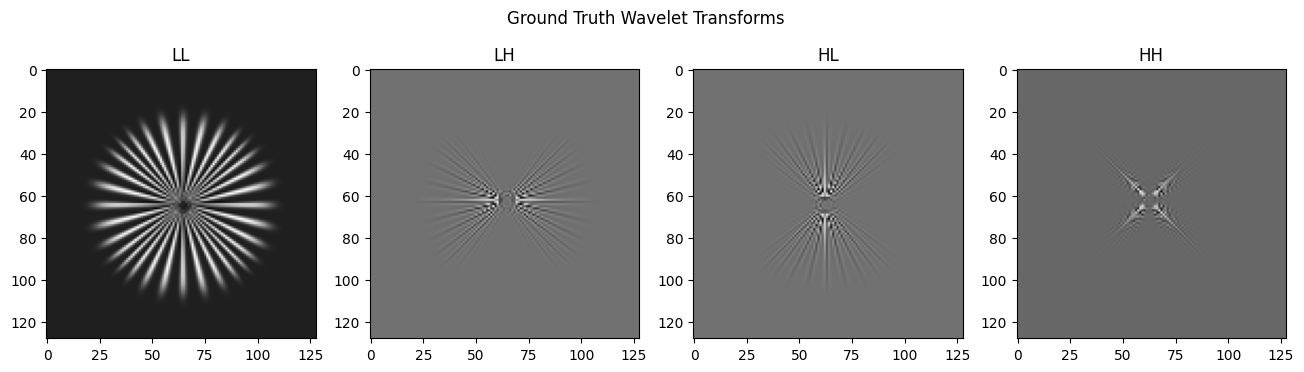

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from tnia.wavelets.dwt import dwt2d

# Wavelet transform of image, and plot approximation and details
titles=['LL', 'LH', 'HL', 'HH']

waves_img = dwt2d(img, wavelet='db4', level=1) 
fig = imshow_multi2d(waves_img, titles, 1, 4, width=16, height=4, colormap='gray')
fig.suptitle('Ground Truth Wavelet Transforms')

0.0 0.0060154707


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\psfs.py:118: ComplexWarning: Casting complex values to real discards the imaginary part
  psf = fftshift(ifftn(ifftshift(otf)).astype(np.float32))


Text(0.5, 0.98, 'PSF')

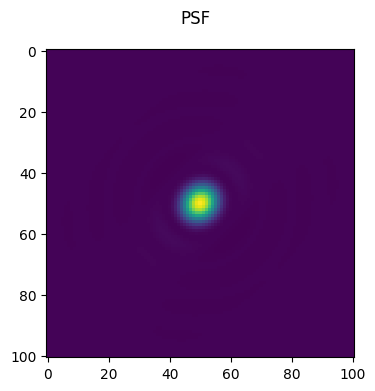

In [3]:
from tnia.deconvolution.psfs import paraxial_psf

m=101
wavelength = 500
na=1.4
pixel_size = 20

psf=paraxial_psf(m, wavelength, na, pixel_size)
psf=psf-psf.min()
psf=psf/psf.sum()
print(psf.min(), psf.max())
fig=imshow2d(psf, width=4, height=4)
fig.suptitle('PSF')


0 10 20 30 40 50 60 70 80 90 


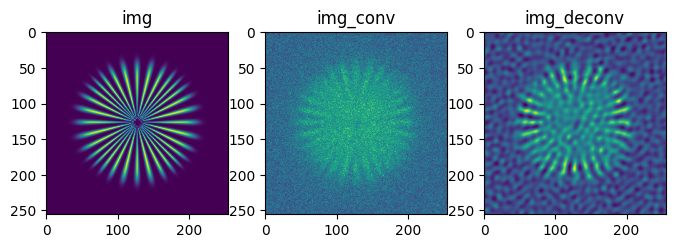

In [103]:

from tnia.deconvolution.forward import forward
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
from tnia.plotting.plt_helper import imshow_multi2d

img_conv=forward(img*100, psf, 100, True)
img_deconv=richardson_lucy_cp(img_conv, psf, 100, True)

fig = imshow_multi2d([img, img_conv, img_deconv], ['img', 'img_conv', 'img_deconv'], 1, 3, width=8, height=4)

Text(0.5, 0.98, 'Deconvolution Wavelet Transforms')

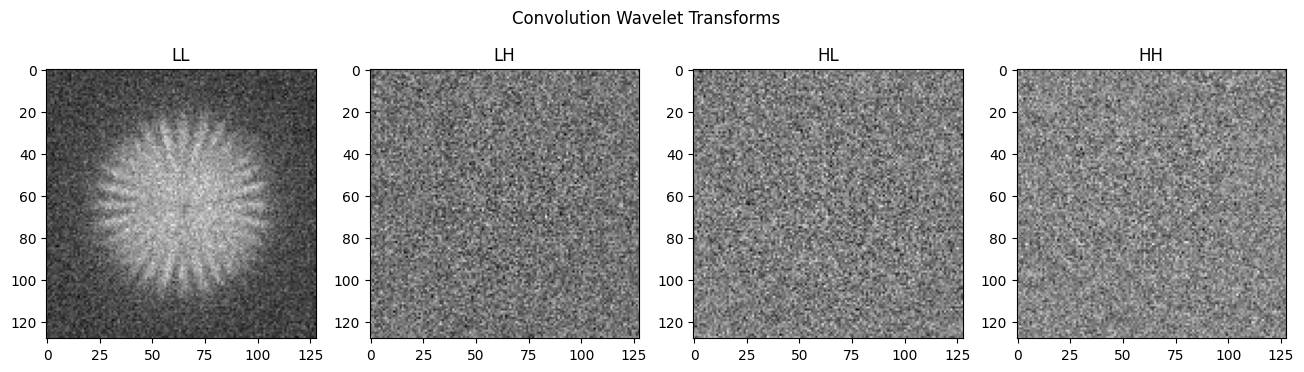

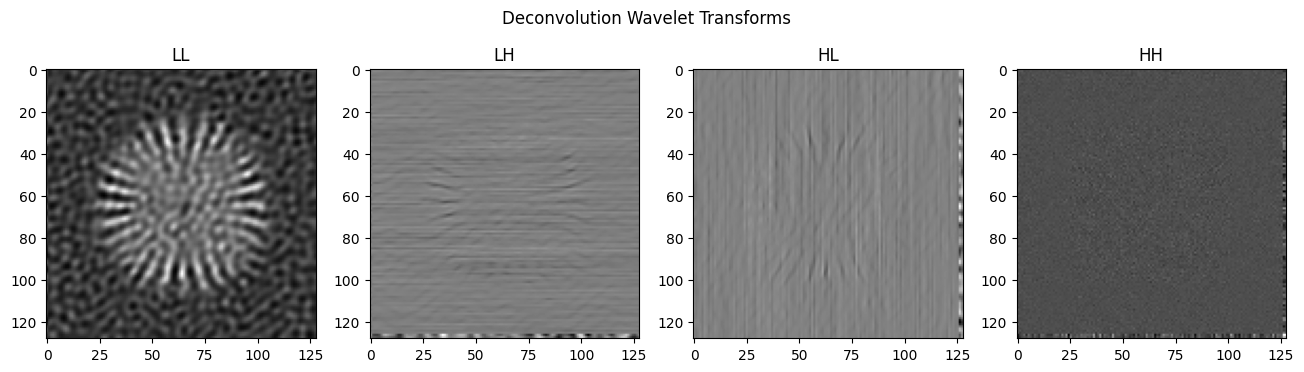

In [105]:
waves_conv = dwt2d(img_conv, wavelet='db4', level=1) 
fig = imshow_multi2d(waves_conv, titles, 1, 4, width=16, height=4, colormap='gray')
fig.suptitle('Convolution Wavelet Transforms')

waves_deconv = dwt2d(img_deconv, wavelet='db4', level=1) 
fig = imshow_multi2d(waves_deconv, titles, 1, 4, width=16, height=4, colormap='gray')
fig.suptitle('Deconvolution Wavelet Transforms')


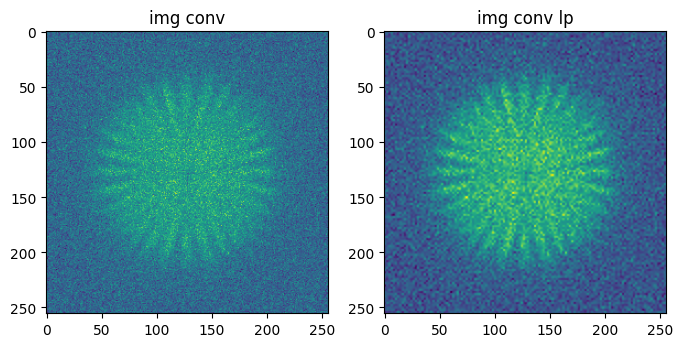

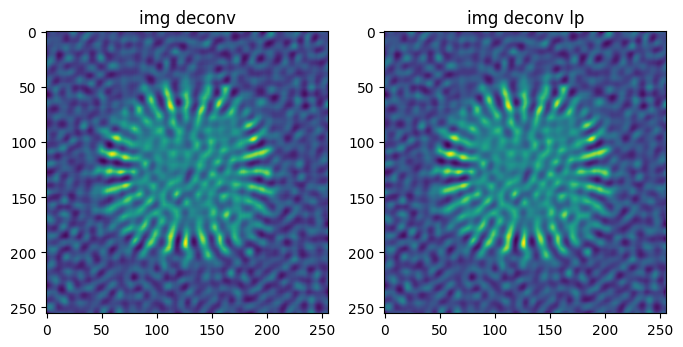

In [106]:
from tnia.wavelets.dwt import idwt2d
# inverse wavelet transform
img_ = idwt2d([waves_img[0], None, None, None], wavelet='db4')
img_conv_lp = idwt2d([waves_conv[0], None, None, None], wavelet='db4')
img_deconv_lp = idwt2d([waves_deconv[0], None, None, None], wavelet='db4')

fig = imshow_multi2d([img_conv, img_conv_lp], ['img conv', 'img conv lp'], 1, 2, width=8, height=4)
fig = imshow_multi2d([img_deconv, img_deconv_lp], ['img deconv', 'img deconv lp'], 1, 2, width=8, height=4)

In [107]:
from tnia.metrics.errors import RMSE

print(RMSE(img_conv, img*100))
print(RMSE(img_conv_lp, img*100))
print(RMSE(img_deconv, img*100))
print(RMSE(img_deconv_lp, img*100))

101.97263
101.572784
101.4878
101.48662


In [ ]:
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp

decon = richardson_lucy_cp(LL)